In [132]:
import yfinance as yf
import pandas as pd


In [133]:
TICKERS = {
    "BNP Paribas": "BNP.PA",
    "Société Générale": "GLE.PA",
    "Crédit Agricole": "ACA.PA"
}

In [134]:
ticker = yf.Ticker("BNP.PA")

income_stmt = ticker.income_stmt
balance_sheet = ticker.balance_sheet

income_stmt.head(), balance_sheet.head()


(                                                      2024-12-31  \
 Tax Effect Of Unusual Items                         1.991200e+07   
 Tax Rate For Calcs                                  2.620000e-01   
 Total Unusual Items                                 7.600000e+07   
 Total Unusual Items Excluding Goodwill              7.600000e+07   
 Net Income From Continuing Operation Net Minori...  1.168800e+10   
 
                                                       2023-12-31  \
 Tax Effect Of Unusual Items                        -7.325000e+06   
 Tax Rate For Calcs                                  2.930000e-01   
 Total Unusual Items                                -2.500000e+07   
 Total Unusual Items Excluding Goodwill             -2.500000e+07   
 Net Income From Continuing Operation Net Minori...  8.028000e+09   
 
                                                       2022-12-31  \
 Tax Effect Of Unusual Items                         2.851200e+07   
 Tax Rate For Calcs           

In [135]:
income_stmt.index.tolist()


['Tax Effect Of Unusual Items',
 'Tax Rate For Calcs',
 'Total Unusual Items',
 'Total Unusual Items Excluding Goodwill',
 'Net Income From Continuing Operation Net Minority Interest',
 'Reconciled Depreciation',
 'Net Interest Income',
 'Interest Expense',
 'Interest Income',
 'Normalized Income',
 'Net Income From Continuing And Discontinued Operation',
 'Diluted Average Shares',
 'Basic Average Shares',
 'Diluted EPS',
 'Basic EPS',
 'Diluted NI Availto Com Stockholders',
 'Net Income Common Stockholders',
 'Otherunder Preferred Stock Dividend',
 'Net Income',
 'Minority Interests',
 'Net Income Including Noncontrolling Interests',
 'Net Income Discontinuous Operations',
 'Net Income Continuous Operations',
 'Tax Provision',
 'Pretax Income',
 'Special Income Charges',
 'Other Special Charges',
 'Write Off',
 'Impairment Of Capital Assets',
 'Restructuring And Mergern Acquisition',
 'Gain On Sale Of Security',
 'Operating Expense',
 'Other Operating Expenses',
 'Depreciation And Amo

In [136]:
balance_sheet.index.tolist()


['Treasury Shares Number',
 'Ordinary Shares Number',
 'Share Issued',
 'Net Debt',
 'Total Debt',
 'Tangible Book Value',
 'Invested Capital',
 'Net Tangible Assets',
 'Common Stock Equity',
 'Total Capitalization',
 'Total Equity Gross Minority Interest',
 'Minority Interest',
 'Stockholders Equity',
 'Other Equity Interest',
 'Retained Earnings',
 'Capital Stock',
 'Common Stock',
 'Total Liabilities Net Minority Interest',
 'Derivative Product Liabilities',
 'Long Term Debt And Capital Lease Obligation',
 'Payables',
 'Other Payable',
 'Total Tax Payable',
 'Total Assets',
 'Investments And Advances',
 'Investmentin Financial Assets',
 'Held To Maturity Securities',
 'Available For Sale Securities',
 'Financial Assets Designatedas Fair Value Through Profitor Loss Total',
 'Trading Securities',
 'Long Term Equity Investment',
 'Investmentsin Joint Venturesat Cost',
 'Investmentsin Associatesat Cost',
 'Investment Properties',
 'Goodwill And Other Intangible Assets',
 'Other Intangib

In [137]:
income_keys = [
    "Total Revenue",
    "Net Income"
]

income_selected = income_stmt.loc[income_keys]
income_selected


,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Total Revenue,6.587000e+10,5.973500e+10,5.747700e+10,5.635500e+10,NaN
Net Income,1.168800e+10,1.097500e+10,9.848000e+09,9.488000e+09,NaN


In [138]:
income_keys = [
    "Total Revenue",
    "Net Income"
]

balance_keys = [
    "Total Assets",
    "Total Liabilities Net Minority Interest",
    "Stockholders Equity"
]

income_selected = income_stmt.loc[income_keys]
balance_selected = balance_sheet.loc[balance_keys]

income_selected, balance_selected


(                 2024-12-31    2023-12-31    2022-12-31    2021-12-31  \
 Total Revenue  6.587000e+10  5.973500e+10  5.747700e+10  5.635500e+10   
 Net Income     1.168800e+10  1.097500e+10  9.848000e+09  9.488000e+09   
 
                2020-12-31  
 Total Revenue         NaN  
 Net Income            NaN  ,
                                            2024-12-31    2023-12-31  \
 Total Assets                             2.704908e+12  2.591499e+12   
 Total Liabilities Net Minority Interest  2.570767e+12  2.462632e+12   
 Stockholders Equity                      1.281370e+11  1.237420e+11   
 
                                            2022-12-31    2021-12-31  \
 Total Assets                             2.663748e+12  2.634444e+12   
 Total Liabilities Net Minority Interest  2.537738e+12  2.511937e+12   
 Stockholders Equity                      1.212370e+11  1.178860e+11   
 
                                          2020-12-31  
 Total Assets                                    NaN 

In [139]:
income_t = income_selected.T
balance_t = balance_selected.T

df_bnp = pd.concat([income_t, balance_t], axis=1)
df_bnp["bank"] = "BNP Paribas"

df_bnp


,Total Revenue,Net Income,Total Assets,Total Liabilities Net Minority Interest,Stockholders Equity,bank
2024-12-31,6.587000e+10,1.168800e+10,2.704908e+12,2.570767e+12,1.281370e+11,BNP Paribas
2023-12-31,5.973500e+10,1.097500e+10,2.591499e+12,2.462632e+12,1.237420e+11,BNP Paribas
2022-12-31,5.747700e+10,9.848000e+09,2.663748e+12,2.537738e+12,1.212370e+11,BNP Paribas
2021-12-31,5.635500e+10,9.488000e+09,2.634444e+12,2.511937e+12,1.178860e+11,BNP Paribas
2020-12-31,NaN,NaN,NaN,NaN,NaN,BNP Paribas


In [140]:
df_bnp.head()

df_bnp.columns.tolist()

df_bnp.shape

(5, 6)

In [141]:
def load_bank_financials(bank_name, ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)

    income_stmt = ticker.income_stmt
    balance_sheet = ticker.balance_sheet

    income_keys = [
        "Total Revenue",
        "Net Income"
    ]

    balance_keys = [
        "Total Assets",
        "Total Liabilities Net Minority Interest",
        "Stockholders Equity"
    ]

    income_selected = income_stmt.loc[income_keys]
    balance_selected = balance_sheet.loc[balance_keys]

    df = pd.concat(
        [income_selected.T, balance_selected.T],
        axis=1
    )

    df["bank"] = bank_name
    return df


In [142]:
dfs = []

for bank, ticker in TICKERS.items():
    df_bank = load_bank_financials(bank, ticker)
    dfs.append(df_bank)

df_all = pd.concat(dfs)
df_all


,Total Revenue,Net Income,Total Assets,Total Liabilities Net Minority Interest,Stockholders Equity,bank
2024-12-31,6.587000e+10,1.168800e+10,2.704908e+12,2.570767e+12,1.281370e+11,BNP Paribas
2023-12-31,5.973500e+10,1.097500e+10,2.591499e+12,2.462632e+12,1.237420e+11,BNP Paribas
2022-12-31,5.747700e+10,9.848000e+09,2.663748e+12,2.537738e+12,1.212370e+11,BNP Paribas
2021-12-31,5.635500e+10,9.488000e+09,2.634444e+12,2.511937e+12,1.178860e+11,BNP Paribas
2020-12-31,NaN,NaN,NaN,NaN,NaN,BNP Paribas
2024-12-31,5.250900e+10,4.200000e+09,1.573545e+12,1.493957e+12,7.025600e+10,Société Générale
2023-12-31,4.435900e+10,2.493000e+09,1.554045e+12,1.477798e+12,6.597500e+10,Société Générale
2022-12-31,3.609600e+10,1.825000e+09,1.484900e+12,1.411574e+12,6.697000e+10,Société Générale
2021-12-31,3.624800e+10,5.641000e+09,1.463573e+12,1.392664e+12,6.509800e+10,Société Générale
2020-12-31,NaN,NaN,NaN,NaN,NaN,Société Générale


In [143]:
df = df_all.dropna().copy()
df


,Total Revenue,Net Income,Total Assets,Total Liabilities Net Minority Interest,Stockholders Equity,bank
2024-12-31,6.587000e+10,1.168800e+10,2.704908e+12,2.570767e+12,1.281370e+11,BNP Paribas
2023-12-31,5.973500e+10,1.097500e+10,2.591499e+12,2.462632e+12,1.237420e+11,BNP Paribas
2022-12-31,5.747700e+10,9.848000e+09,2.663748e+12,2.537738e+12,1.212370e+11,BNP Paribas
2021-12-31,5.635500e+10,9.488000e+09,2.634444e+12,2.511937e+12,1.178860e+11,BNP Paribas
2024-12-31,5.250900e+10,4.200000e+09,1.573545e+12,1.493957e+12,7.025600e+10,Société Générale
2023-12-31,4.435900e+10,2.493000e+09,1.554045e+12,1.477798e+12,6.597500e+10,Société Générale
2022-12-31,3.609600e+10,1.825000e+09,1.484900e+12,1.411574e+12,6.697000e+10,Société Générale
2021-12-31,3.624800e+10,5.641000e+09,1.463573e+12,1.392664e+12,6.509800e+10,Société Générale
2021-12-31,2.139700e+10,5.844000e+09,2.073955e+12,1.997039e+12,6.821700e+10,Crédit Agricole
2022-12-31,2.064600e+10,5.306000e+09,2.138086e+12,2.062606e+12,6.651900e+10,Crédit Agricole


In [144]:
df.index = pd.to_datetime(df.index)
df["year"] = df.index.year
df

,Total Revenue,Net Income,Total Assets,Total Liabilities Net Minority Interest,Stockholders Equity,bank,year
2024-12-31,6.587000e+10,1.168800e+10,2.704908e+12,2.570767e+12,1.281370e+11,BNP Paribas,2024
2023-12-31,5.973500e+10,1.097500e+10,2.591499e+12,2.462632e+12,1.237420e+11,BNP Paribas,2023
2022-12-31,5.747700e+10,9.848000e+09,2.663748e+12,2.537738e+12,1.212370e+11,BNP Paribas,2022
2021-12-31,5.635500e+10,9.488000e+09,2.634444e+12,2.511937e+12,1.178860e+11,BNP Paribas,2021
2024-12-31,5.250900e+10,4.200000e+09,1.573545e+12,1.493957e+12,7.025600e+10,Société Générale,2024
2023-12-31,4.435900e+10,2.493000e+09,1.554045e+12,1.477798e+12,6.597500e+10,Société Générale,2023
2022-12-31,3.609600e+10,1.825000e+09,1.484900e+12,1.411574e+12,6.697000e+10,Société Générale,2022
2021-12-31,3.624800e+10,5.641000e+09,1.463573e+12,1.392664e+12,6.509800e+10,Société Générale,2021
2021-12-31,2.139700e+10,5.844000e+09,2.073955e+12,1.997039e+12,6.821700e+10,Crédit Agricole,2021
2022-12-31,2.064600e+10,5.306000e+09,2.138086e+12,2.062606e+12,6.651900e+10,Crédit Agricole,2022


In [145]:
df["leverage_ratio"] = (
    df["Total Liabilities Net Minority Interest"] / df["Stockholders Equity"]
)

df["roe"] = (
    df["Net Income"] / df["Stockholders Equity"]
)

df["roa"] = (
    df["Net Income"] / df["Total Assets"]
)

df


,Total Revenue,Net Income,Total Assets,Total Liabilities Net Minority Interest,Stockholders Equity,bank,year,leverage_ratio,roe,roa
2024-12-31,6.587000e+10,1.168800e+10,2.704908e+12,2.570767e+12,1.281370e+11,BNP Paribas,2024,20.062644,0.091215,0.004321
2023-12-31,5.973500e+10,1.097500e+10,2.591499e+12,2.462632e+12,1.237420e+11,BNP Paribas,2023,19.901343,0.088693,0.004235
2022-12-31,5.747700e+10,9.848000e+09,2.663748e+12,2.537738e+12,1.212370e+11,BNP Paribas,2022,20.932042,0.081229,0.003697
2021-12-31,5.635500e+10,9.488000e+09,2.634444e+12,2.511937e+12,1.178860e+11,BNP Paribas,2021,21.308188,0.080485,0.003602
2024-12-31,5.250900e+10,4.200000e+09,1.573545e+12,1.493957e+12,7.025600e+10,Société Générale,2024,21.264476,0.059781,0.002669
2023-12-31,4.435900e+10,2.493000e+09,1.554045e+12,1.477798e+12,6.597500e+10,Société Générale,2023,22.399363,0.037787,0.001604
2022-12-31,3.609600e+10,1.825000e+09,1.484900e+12,1.411574e+12,6.697000e+10,Société Générale,2022,21.077706,0.027251,0.001229
2021-12-31,3.624800e+10,5.641000e+09,1.463573e+12,1.392664e+12,6.509800e+10,Société Générale,2021,21.393345,0.086654,0.003854
2021-12-31,2.139700e+10,5.844000e+09,2.073955e+12,1.997039e+12,6.821700e+10,Crédit Agricole,2021,29.274800,0.085668,0.002818
2022-12-31,2.064600e+10,5.306000e+09,2.138086e+12,2.062606e+12,6.651900e+10,Crédit Agricole,2022,31.007772,0.079767,0.002482


In [146]:
df[["bank", "year", "leverage_ratio", "roe", "roa"]].head(10)


,bank,year,leverage_ratio,roe,roa
2024-12-31,BNP Paribas,2024,20.062644,0.091215,0.004321
2023-12-31,BNP Paribas,2023,19.901343,0.088693,0.004235
2022-12-31,BNP Paribas,2022,20.932042,0.081229,0.003697
2021-12-31,BNP Paribas,2021,21.308188,0.080485,0.003602
2024-12-31,Société Générale,2024,21.264476,0.059781,0.002669
2023-12-31,Société Générale,2023,22.399363,0.037787,0.001604
2022-12-31,Société Générale,2022,21.077706,0.027251,0.001229
2021-12-31,Société Générale,2021,21.393345,0.086654,0.003854
2021-12-31,Crédit Agricole,2021,29.274800,0.085668,0.002818
2022-12-31,Crédit Agricole,2022,31.007772,0.079767,0.002482


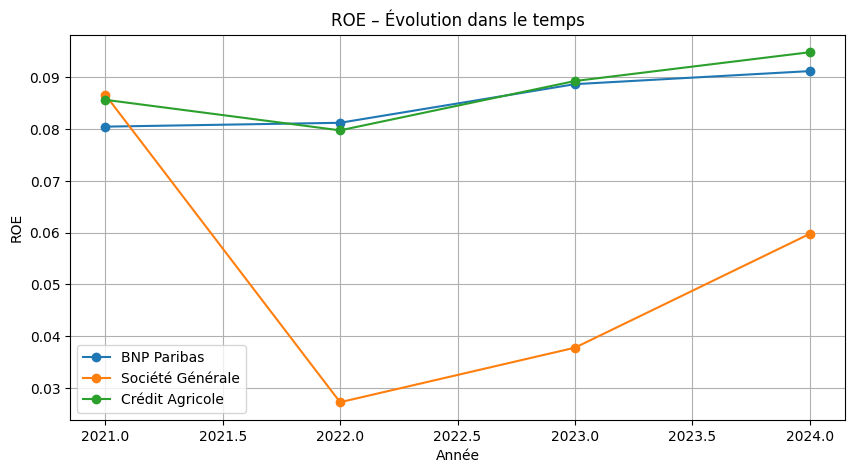

In [147]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

for bank in df["bank"].unique():
    data = df[df["bank"] == bank]
    plt.plot(data["year"], data["roe"], marker="o", label=bank)

plt.title("ROE – Évolution dans le temps")
plt.xlabel("Année")
plt.ylabel("ROE")
plt.legend()
plt.grid(True)
plt.show()


In [148]:
latest_year = df["year"].max()
df_latest = df[df["year"] == latest_year]
df_latest


,Total Revenue,Net Income,Total Assets,Total Liabilities Net Minority Interest,Stockholders Equity,bank,year,leverage_ratio,roe,roa
2024-12-31,6.587000e+10,1.168800e+10,2.704908e+12,2.570767e+12,1.281370e+11,BNP Paribas,2024,20.062644,0.091215,0.004321
2024-12-31,5.250900e+10,4.200000e+09,1.573545e+12,1.493957e+12,7.025600e+10,Société Générale,2024,21.264476,0.059781,0.002669
2024-12-31,2.532800e+10,7.087000e+09,2.309782e+12,2.226471e+12,7.471000e+10,Crédit Agricole,2024,29.801513,0.094860,0.003068


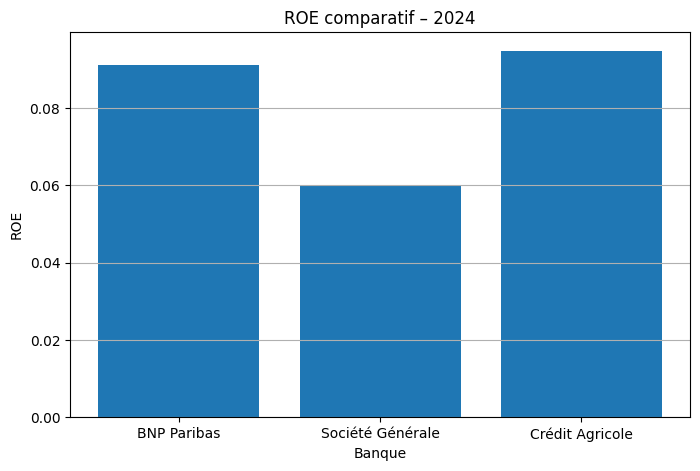

In [149]:
plt.figure(figsize=(8, 5))

plt.bar(
    df_latest["bank"],
    df_latest["roe"]
)

plt.title(f"ROE comparatif – {latest_year}")
plt.ylabel("ROE")
plt.xlabel("Banque")
plt.grid(axis="y")
plt.show()


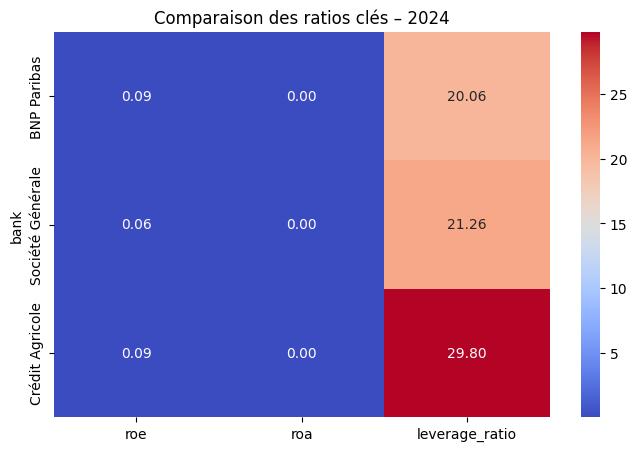

In [150]:
import seaborn as sns

heatmap_data = df_latest.set_index("bank")[[
    "roe",
    "roa",
    "leverage_ratio"
]]

plt.figure(figsize=(8, 5))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

plt.title(f"Comparaison des ratios clés – {latest_year}")
plt.show()


In [151]:
score_df = df[[
    "bank",
    "year",
    "roe",
    "roa",
    "leverage_ratio"
]].copy()

score_df.head()


,bank,year,roe,roa,leverage_ratio
2024-12-31,BNP Paribas,2024,0.091215,0.004321,20.062644
2023-12-31,BNP Paribas,2023,0.088693,0.004235,19.901343
2022-12-31,BNP Paribas,2022,0.081229,0.003697,20.932042
2021-12-31,BNP Paribas,2021,0.080485,0.003602,21.308188
2024-12-31,Société Générale,2024,0.059781,0.002669,21.264476


In [152]:
def min_max_normalize(series):
    return (series - series.min()) / (series.max() - series.min())


In [153]:
score_df["roe_norm"] = min_max_normalize(score_df["roe"])
score_df["roa_norm"] = min_max_normalize(score_df["roa"])

# Pour le levier : moins c’est élevé, mieux c’est
score_df["leverage_norm"] = 1 - min_max_normalize(score_df["leverage_ratio"])

score_df.head()


,bank,year,roe,roa,leverage_ratio,roe_norm,roa_norm,leverage_norm
2024-12-31,BNP Paribas,2024,0.091215,0.004321,20.062644,0.946083,1.000000,0.985477
2023-12-31,BNP Paribas,2023,0.088693,0.004235,19.901343,0.908777,0.972175,1.000000
2022-12-31,BNP Paribas,2022,0.081229,0.003697,20.932042,0.798388,0.798193,0.907198
2021-12-31,BNP Paribas,2021,0.080485,0.003602,21.308188,0.787372,0.767297,0.873331
2024-12-31,Société Générale,2024,0.059781,0.002669,21.264476,0.481153,0.465749,0.877266


In [154]:
score_df["global_score"] = (
    0.4 * score_df["roe_norm"]
    + 0.3 * score_df["roa_norm"]
    + 0.3 * score_df["leverage_norm"]
)

score_df.head()


,bank,year,roe,roa,leverage_ratio,roe_norm,roa_norm,leverage_norm,global_score
2024-12-31,BNP Paribas,2024,0.091215,0.004321,20.062644,0.946083,1.000000,0.985477,0.974076
2023-12-31,BNP Paribas,2023,0.088693,0.004235,19.901343,0.908777,0.972175,1.000000,0.955163
2022-12-31,BNP Paribas,2022,0.081229,0.003697,20.932042,0.798388,0.798193,0.907198,0.830972
2021-12-31,BNP Paribas,2021,0.080485,0.003602,21.308188,0.787372,0.767297,0.873331,0.807137
2024-12-31,Société Générale,2024,0.059781,0.002669,21.264476,0.481153,0.465749,0.877266,0.595366


In [155]:
latest_year = score_df["year"].max()

ranking = (
    score_df[score_df["year"] == latest_year]
    .sort_values("global_score", ascending=False)
    [["bank", "global_score", "roe", "roa", "leverage_ratio"]]
)

ranking


,bank,global_score,roe,roa,leverage_ratio
2024-12-31,BNP Paribas,0.974076,0.091215,0.004321,20.062644
2024-12-31,Crédit Agricole,0.611032,0.094860,0.003068,29.801513
2024-12-31,Société Générale,0.595366,0.059781,0.002669,21.264476


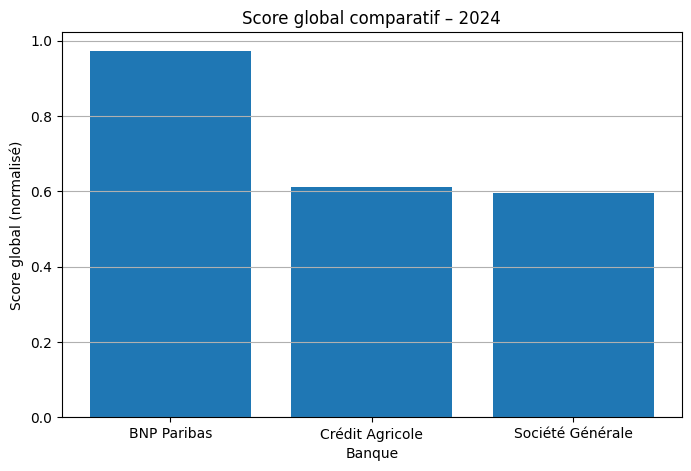

In [156]:
plt.figure(figsize=(8, 5))

plt.bar(
    ranking["bank"],
    ranking["global_score"]
)

plt.title(f"Score global comparatif – {latest_year}")
plt.ylabel("Score global (normalisé)")
plt.xlabel("Banque")
plt.grid(axis="y")
plt.show()
